## Fronteira Eficiente de Markowitz

In [1]:
# vamos importar os módulos necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

c:\users\wende\appdata\local\programs\python\python38-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### Vamos usar os dados do Yahoo Finance ou do Google Finance

In [20]:
# download dos dados pelo Yahoo Finance!

start = datetime(2016, 1, 1)
end = datetime(2020, 7, 1)
acoes = ['WIZS3.SA','COGN3.SA','ITSA4.SA','USIM5.SA','VVAR3.SA','MILS3.SA']
dados = web.get_data_yahoo(acoes, start)['Adj Close']

In [21]:
# checando os dados
dados.describe()

Symbols,WIZS3.SA,COGN3.SA,ITSA4.SA,USIM5.SA,VVAR3.SA,MILS3.SA
count,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,9.644244,11.812926,8.890271,6.649265,5.934934,4.605348
std,2.654503,2.995926,2.645587,2.918288,3.042663,1.757668
min,5.439768,3.660000,3.805703,0.824459,1.073703,1.700000
25%,7.325379,10.213398,6.701859,4.033091,3.734020,3.580000
50%,9.330450,11.489263,8.680361,7.604622,5.280000,4.300000
75%,11.064713,13.576168,11.110457,9.058994,7.561929,5.250000
max,17.236700,20.149920,14.049962,12.366889,16.639999,10.850000


In [22]:
dados.tail()

Symbols,WIZS3.SA,COGN3.SA,ITSA4.SA,USIM5.SA,VVAR3.SA,MILS3.SA
Date,,,,,,
2020-07-01,10.72,6.97,9.79,7.34,15.99,5.91
2020-07-02,10.81,6.92,9.95,7.35,15.39,6.35
2020-07-03,11.01,7.20,9.97,7.46,15.55,7.17
2020-07-06,10.98,7.60,10.36,7.61,15.96,7.00
2020-07-07,10.95,7.45,9.99,7.45,15.86,7.06


### Calculando os retornos

In [23]:
# calculo dos retornos diários e anuais
retorno_diario = dados.pct_change()
retorno_anual = retorno_diario.mean() * 250

In [24]:
retorno_anual.tail()

Symbols
COGN3.SA    0.108680
ITSA4.SA    0.257890
USIM5.SA    0.588291
VVAR3.SA    0.831844
MILS3.SA    0.413125
dtype: float64

### Calculando a covariância

In [26]:
# cálculo da covariância diária e anual
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 250
cov_anual

Symbols,WIZS3.SA,COGN3.SA,ITSA4.SA,USIM5.SA,VVAR3.SA,MILS3.SA
Symbols,,,,,,
WIZS3.SA,0.215769,0.067580,0.046115,0.072346,0.092279,0.077016
COGN3.SA,0.067580,0.273134,0.086628,0.136428,0.138497,0.109706
ITSA4.SA,0.046115,0.086628,0.107072,0.109412,0.085210,0.082540
USIM5.SA,0.072346,0.136428,0.109412,0.444036,0.149252,0.155599
VVAR3.SA,0.092279,0.138497,0.085210,0.149252,0.504070,0.128884
MILS3.SA,0.077016,0.109706,0.082540,0.155599,0.128884,0.375031


### Calulando a correlação

In [27]:
corr = retorno_diario.corr()
corr

Symbols,WIZS3.SA,COGN3.SA,ITSA4.SA,USIM5.SA,VVAR3.SA,MILS3.SA
Symbols,,,,,,
WIZS3.SA,1.000000,0.278378,0.303393,0.233729,0.279810,0.270741
COGN3.SA,0.278378,1.000000,0.506563,0.391748,0.373256,0.342775
ITSA4.SA,0.303393,0.506563,1.000000,0.501784,0.366782,0.411902
USIM5.SA,0.233729,0.391748,0.501784,1.000000,0.315476,0.381297
VVAR3.SA,0.279810,0.373256,0.366782,0.315476,1.000000,0.296429
MILS3.SA,0.270741,0.342775,0.411902,0.381297,0.296429,1.000000


### Criando listas para armanezar as principais variáveis

In [37]:
# vamos criar 4 listas para armazenar os valores do retorno da carteira, o peso de cada ação, a volatilidade e o sharpe ratio
# empty lists to store returns, volatility and weights of imiginary portfolios
retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []

### Simulando o número de portfólios

In [38]:
# vamos usar uma simulação aleatória
numero_acoes = len(acoes)
numero_carteiras = 100000

np.random.seed(101)

In [39]:
# vamos fazer um for loop para preencher as lista que criamos anteriormente
for cada_carteira in range(numero_carteiras):
    # vamos dar um peso aleatório para cada ação dentro de cada carteira
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    # vamos calcular o retorno das carteiras
    retorno = np.dot(peso, retorno_anual)
    # vamos calcular a volatilidade das carteiras
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))
    # vamos calcular o índice de Sharpe de cada carteira
    sharpe = retorno / volatilidade
    # aqui nós usamos o método apend para incluir cada carteira nas listas criadas anteriormente
    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)

### Criando dicionário com os dados

In [40]:
carteira = {'Retorno': retorno_carteira,
             'Volatilidade': volatilidade_carteira,
             'Sharpe Ratio': sharpe_ratio}

for contar,acao in enumerate(acoes):
    carteira[acao+' Peso'] = [Peso[contar] for Peso in peso_acoes]

# vamos transformar nosso dicionário em um dataframe
df = pd.DataFrame(carteira)

# vamos nomear as colunas do novo dataframe
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]
df = df[colunas]
df

,Retorno,Volatilidade,Sharpe Ratio,WIZS3.SA Peso,COGN3.SA Peso,ITSA4.SA Peso,USIM5.SA Peso,VVAR3.SA Peso,MILS3.SA Peso
0,0.426378,0.409454,1.041333,0.184018,0.203357,0.010147,0.061122,0.244198,0.297158
1,0.353775,0.367788,0.961898,0.101698,0.296053,0.239047,0.062927,0.183615,0.116661
2,0.290718,0.355083,0.818733,0.063767,0.275414,0.338476,0.081458,0.029295,0.211590
3,0.320027,0.343678,0.931185,0.304412,0.115351,0.286169,0.216250,0.020246,0.057571
4,0.409957,0.397599,1.031080,0.052556,0.279497,0.146356,0.162695,0.206554,0.152343
...,...,...,...,...,...,...,...,...,...
99995,0.453416,0.395569,1.146238,0.198040,0.159540,0.180336,0.082707,0.337569,0.041809
99996,0.381196,0.372395,1.023634,0.342747,0.155809,0.085799,0.211290,0.141557,0.062798
99997,0.370335,0.373424,0.991728,0.306569,0.187656,0.084687,0.020317,0.201248,0.199523
99998,0.409035,0.387716,1.054986,0.311092,0.020411,0.094798,0.084108,0.151258,0.338333


### Criando o gráfico da fronteira eficiente

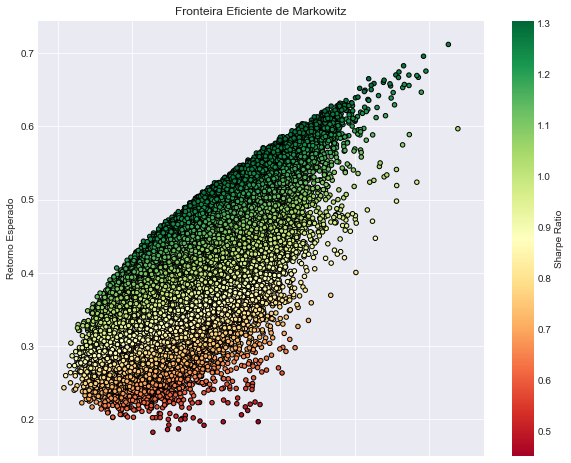

In [41]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Identificando o melhor Sharpe Ratio e a carteira de mínima variância

In [42]:
# vamos identificar as variáveis de interesse
menor_volatilidade = df['Volatilidade'].min()
maior_sharpe = df['Sharpe Ratio'].max()

# vamos identificar os dois principais portfolios
carteira_sharpe = df.loc[df['Sharpe Ratio'] == maior_sharpe]
carteira_min_variancia = df.loc[df['Volatilidade'] == menor_volatilidade]

### Criando novo gráfico da fronteira eficiente

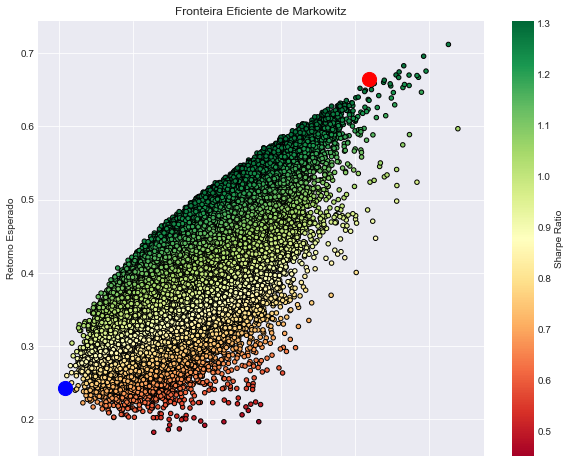

In [43]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=carteira_sharpe['Volatilidade'], y=carteira_sharpe['Retorno'], c='red', marker='o', s=200)
plt.scatter(x=carteira_min_variancia['Volatilidade'], y=carteira_min_variancia['Retorno'], c='blue', marker='o', s=200 )
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Analisando as duas principais carteiras

In [44]:
print ("Essa é a carteira de Mínima Variância:", '\n', carteira_min_variancia.T)
print ('\n')
print ("Essa é a carteira com maior Sharpe Ratio:", '\n', carteira_sharpe.T * 100)

Essa é a carteira de Mínima Variância: 
                   17320
Retorno        0.242795
Volatilidade   0.303959
Sharpe Ratio   0.798775
WIZS3.SA Peso  0.292167
COGN3.SA Peso  0.112988
ITSA4.SA Peso  0.557881
USIM5.SA Peso  0.000531
VVAR3.SA Peso  0.019299
MILS3.SA Peso  0.017134


Essa é a carteira com maior Sharpe Ratio: 
                     97485
Retorno         66.507887
Volatilidade    50.950997
Sharpe Ratio   130.533043
WIZS3.SA Peso    1.471786
COGN3.SA Peso    0.164430
ITSA4.SA Peso    8.922212
USIM5.SA Peso   24.615236
VVAR3.SA Peso   53.994175
MILS3.SA Peso   10.832162
